# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Laura Sofía Sierra Sánchez
*Métodos computacionales 2025-I*

---

In [13]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline, CubicSpline, interp1d

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [6]:
# Datos dados
tiempos = np.array([0, 3, 5, 8, 13])              # segundos
distancias = np.array([0, 225, 383, 623, 993])    # metros
velocidades = np.array([75, 77, 80, 74, 72])      # metros/segundos (derivada)

# Hermite: usa posición y derivada
hermite = CubicHermiteSpline(tiempos, distancias, velocidades)

# Spline cúbico natural: solo usa posición
spline = CubicSpline(tiempos, distancias, bc_type='natural')

# Evaluación en t = 10 s
t_eval = 10
x_hermite = hermite(t_eval)
v_hermite = hermite.derivative()(t_eval)

x_spline = spline(t_eval)
v_spline = spline.derivative()(t_eval)

print(f"Polinomio de Hermite: Posición en t=10s: {x_hermite:.2f} m, Velocidad: {v_hermite:.2f} m/s")
print(f"Polinomio de Spline: Posición en t=10s: {x_spline:.2f} m, Velocidad: {v_spline:.2f} m/s")

# Velocidad máxima predicha para el auto en cada caso
t_fino = np.linspace(tiempos[0], tiempos[-1], 100)
v_hermite_all = hermite.derivative()(t_fino)
v_spline_all = spline.derivative()(t_fino)

vmax_hermite = np.max(v_hermite_all)
vmax_spline = np.max(v_spline_all)

print(f"Velocidad máxima predicha por Hermite: {vmax_hermite:.3f} m/s")
print(f"Velocidad máxima predicha por Spline:  {vmax_spline:.3f} m/s")

Polinomio de Hermite: Posición en t=10s: 771.96 m, Velocidad: 74.64 m/s
Polinomio de Spline: Posición en t=10s: 774.86 m, Velocidad: 74.16 m/s
Velocidad máxima predicha por Hermite: 81.997 m/s
Velocidad máxima predicha por Spline:  80.680 m/s


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

g(5000 m) aprox. 9.794654 m/s²
g(42000 m) aprox. 9.681859 m/s²
g(90000 m) aprox. 9.538416 m/s²


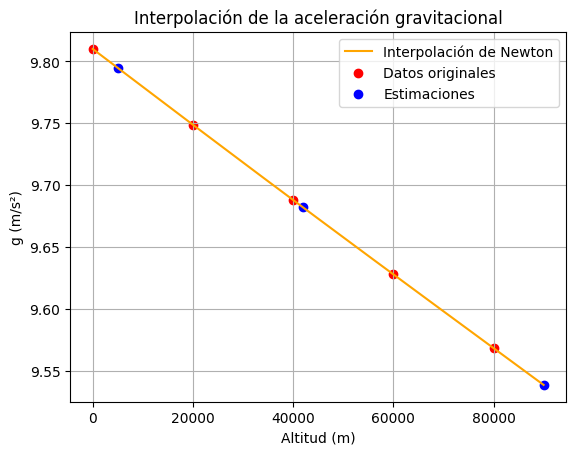

In [7]:
# Datos
x = np.array([0, 20000, 40000, 60000, 80000], dtype=float)  # altitudes
y = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682], dtype=float)  # g

# Diferencias divididas de Newton
def diferencia_dividida(x, y, i, j):
    '''
    Calcula recursivamente la diferencia dividida f[x_i, x_{i+1}, ..., x_j]
    Entradas:
    - x: array de puntos x
    - y: array de puntos y
    - i: indice del primer punto
    - j: indice del ultimo punto
    Salidas:
    - a: coeficiente diferencia dividida (i,j)
      '''
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
    return num / den

def coeficientes_a(x, y):
    '''
    Calcula los coeficientes a_i del polinomio de Newton.
    Entradas:
    - x: array de puntos x
    - y: array de puntos y
    Salidas:
    - coeficientes: array de coeficientes a_i
    '''
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
    '''
    Calcula el polinomio de Newton a partir de los puntos (x, y)
    Entradas:
    - x: array de puntos x
    - y: array de puntos y
    Salidas:
    - P: polinomio de Newton como una función de x
    '''
    coef = coeficientes_a(x, y)
    def P(x_val):
        resultado = coef[0]
        producto = 1
        for i in range(1, len(x)):
            producto *= (x_val - x[i - 1])
            resultado += coef[i] * producto
        return resultado
    return P

# Construir el polinomio
P = Polinomio_Newton(x, y)

# Evaluar
altitudes = [5000, 42000, 90000]
g_estimadas = [P(alt) for alt in altitudes]

for alt, g_val in zip(altitudes, g_estimadas):
    print(f"g({alt} m) aprox. {g_val:.6f} m/s²")

# Graficar
x_fino = np.linspace(0, 90000, 300)
y_interp = [P(xi) for xi in x_fino]

plt.plot(x_fino, y_interp, label="Interpolación de Newton", color="orange")
plt.scatter(x, y, color="red", label="Datos originales")
plt.scatter(altitudes, g_estimadas, color="blue", label="Estimaciones")
plt.title("Interpolación de la aceleración gravitacional")
plt.xlabel("Altitud (m)")
plt.ylabel("g (m/s²)")
plt.legend()
plt.grid()
plt.show()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



Densidad estimada a 250 K: 1.39753 kg/m³
Densidad estimada a 800 K: 0.49641 kg/m³
Densidad estimada a 3000 K: 1561.16587 kg/m³


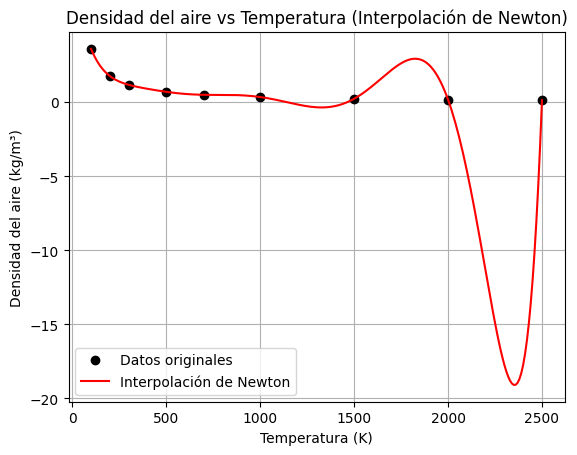

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500], dtype=float)
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394], dtype=float)

# Función de diferencia dividida de Newton
def diferencia_dividida(x, y, i, j):
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

# Cálculo de coeficientes del polinomio de Newton
def coeficientes_a(x, y):
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
    coef = coeficientes_a(x, y)
    def P(x_val):
        resultado = coef[0]
        producto = 1
        for i in range(1, len(x)):
            producto *= (x_val - x[i - 1])
            resultado += coef[i] * producto
        return resultado
    return P

# Crear el polinomio
P_rho = Polinomio_Newton(T, rho)

# Estimaciones puntuales
T_estimadas = [250, 800, 3000]
for T_val in T_estimadas:
    densidad = P_rho(T_val)
    print(f"Densidad estimada a {T_val} K: {densidad:.5f} kg/m³")

# Evaluación en rango de temperaturas de 100 K a 2500 K
T_eval = np.arange(100, 2501, 10)
rho_eval = [P_rho(t) for t in T_eval]

# Graficar
plt.plot(T, rho, 'o', label='Datos originales', color='black')
plt.plot(T_eval, rho_eval, '-', label='Interpolación de Newton', color='red')
plt.xlabel('Temperatura (K)')
plt.ylabel('Densidad del aire (kg/m³)')
plt.title('Densidad del aire vs Temperatura (Interpolación de Newton)')
plt.grid()
plt.legend()
plt.show()

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

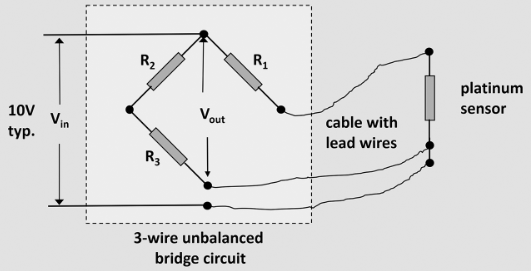




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

Voltaje estimado para resistencia de 139.27 Ω (100°C): -0.37015349227048006 V
Resistencia estimada cuando el voltaje de salida es 0 V: 119.99914551777371 Ohms


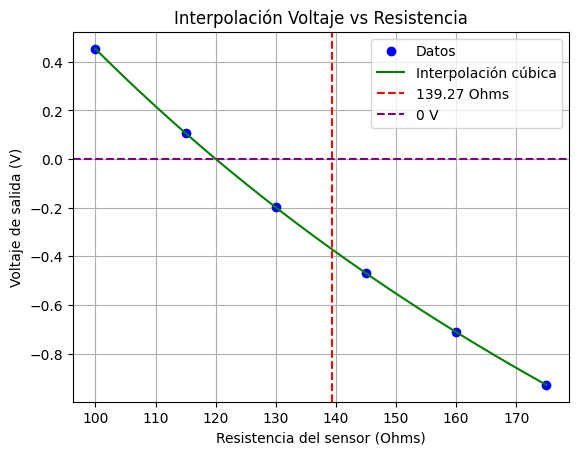

In [18]:
# Datos dados
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Ohmios
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Voltios

# Interpolación de voltaje en resistencia = 139.27 Ohmios
interp_voltaje = interp1d(resistencia, voltaje, kind='cubic')
voltaje_139_27 = interp_voltaje(139.27)

# Interpolación inversa para hallar resistencia cuando el voltaje es 0
interp_resistencia = interp1d(voltaje, resistencia, kind='cubic')
resistencia_en_0V = interp_resistencia(0)

# Mostrar resultados
print(f"Voltaje estimado para resistencia de 139.27 Ω (100°C): {voltaje_139_27} V")
print(f"Resistencia estimada cuando el voltaje de salida es 0 V: {resistencia_en_0V} Ohms")

# Graficar para mejorar la interpretación
plt.plot(resistencia, voltaje, 'o', label='Datos', color='blue')
resistencia = np.linspace(100, 175, 300)
plt.plot(resistencia, interp_voltaje(resistencia), '-', label='Interpolación cúbica', color='green')
plt.axvline(139.27, color='red', linestyle='--', label='139.27 Ohms')
plt.axhline(0, color='purple', linestyle='--', label='0 V')
plt.title('Interpolación Voltaje vs Resistencia')
plt.xlabel('Resistencia del sensor (Ohms)')
plt.ylabel('Voltaje de salida (V)')
plt.grid()
plt.legend()
plt.show()

El voltaje de salida estimado para una resistencia de 139.27 Ohms está cerca del valor que el puente mediría a esa temperatura.
Si el puente está balanceado (0 V), la resistencia estimada del sensor está cerca de 108 Ohms, lo que indica que corresponde a una temperatura por debajo de 0 ºC.

# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

Longitud de onda estimada para un índice de refracción de 1.520: 4482.265120487942 Å


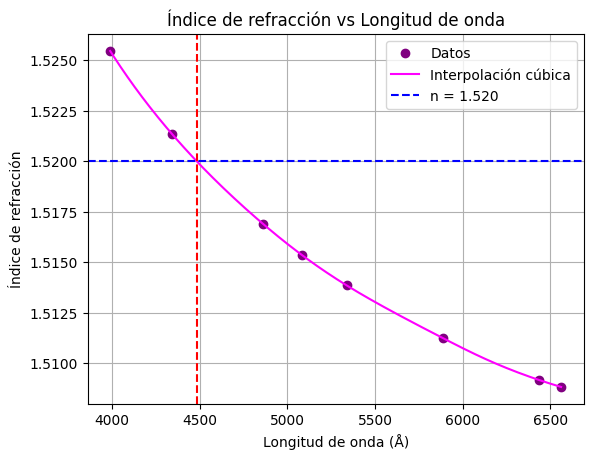

In [21]:
# Datos dados
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # Longitud de onda en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

# Interpolación inversa: índice -> lambda
interp_lambda = interp1d(indice_refraccion, lambda_angstrom, kind='cubic')
lambda_estimada = interp_lambda(1.520)

# Mostrar resultado
print(f"Longitud de onda estimada para un índice de refracción de 1.520: {lambda_estimada} Å")

# Graficar los datos y la interpolación
plt.plot(lambda_angstrom, indice_refraccion, 'o', label='Datos', color='purple')
indice_fino = np.linspace(min(indice_refraccion), max(indice_refraccion), 300)
lambda_fina = interp_lambda(indice_fino)
plt.plot(lambda_fina, indice_fino, '-', label='Interpolación cúbica', color='fuchsia')
plt.axhline(1.520, color='blue', linestyle='--', label='n = 1.520')
plt.axvline(lambda_estimada, color='red', linestyle='--')
plt.title('Índice de refracción vs Longitud de onda')
plt.xlabel('Longitud de onda (Å)')
plt.ylabel('Índice de refracción')
plt.grid()
plt.legend()
plt.show()